In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('movie_success_rate.csv')
df.head(20)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016.0,103.0,6.1,56036.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016.0,128.0,8.3,258682.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,9.0,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016.0,141.0,7.1,7188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.0,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016.0,116.0,7.0,192177.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11.0,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016.0,133.0,7.5,232072.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
column = ['Genre','Description','Director','Actors']
df = df.drop(column, axis =1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Year                838 non-null    float64
 3   Runtime (Minutes)   838 non-null    float64
 4   Rating              839 non-null    float64
 5   Votes               839 non-null    float64
 6   Revenue (Millions)  839 non-null    float64
 7   Metascore           838 non-null    float64
 8   Action              838 non-null    float64
 9   Adventure           838 non-null    float64
 10  Aniimation          838 non-null    float64
 11  Biography           838 non-null    float64
 12  Comedy              838 non-null    float64
 13  Crime               838 non-null    float64
 14  Drama               838 non-null    float64
 15  Family              838 non-null    float64
 16  Fantasy 

In [5]:
df.head(20)

,Rank,Title,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,2014.0,121.0,8.1,757074.0,333.13,76.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,2012.0,124.0,7.0,485820.0,126.46,65.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,2016.0,117.0,7.3,157606.0,138.12,62.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,2016.0,108.0,7.2,60545.0,270.32,59.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,2016.0,123.0,6.2,393727.0,325.02,40.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,The Great Wall,2016.0,103.0,6.1,56036.0,45.13,42.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,La La Land,2016.0,128.0,8.3,258682.0,151.06,93.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,9.0,The Lost City of Z,2016.0,141.0,7.1,7188.0,8.01,78.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.0,Passengers,2016.0,116.0,7.0,192177.0,100.01,41.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11.0,Fantastic Beasts and Where to Find Them,2016.0,133.0,7.5,232072.0,234.02,66.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df.shape

(839, 29)

In [7]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
count,838.000000,838.00000,838.000000,839.00000,8.390000e+02,839.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.81432,1.932303e+05,84.564558,59.575179,0.330549,0.291169,0.053699,...,0.023866,0.005967,0.102625,0.143198,0.127685,0.017900,0.176611,0.011933,0.004773,0.177804
std,286.572065,3.17236,18.470922,0.87723,1.929838e+05,104.457845,16.952416,0.470692,0.454573,0.225558,...,0.152724,0.077059,0.303650,0.350484,0.333938,0.132666,0.381567,0.108650,0.068965,0.382576
min,1.000000,2006.00000,66.000000,1.90000,1.780000e+02,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.30000,6.145500e+04,13.975000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.90000,1.371170e+05,48.240000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.50000,2.708650e+05,116.730000,72.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,2016.00000,187.000000,9.00000,1.791916e+06,936.630000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# CHECKING FOR MISSING ENTRY
df.isnull().sum().sum()

26

In [9]:
# FILL MISSING ENTRY WITH ZERO
df = df.fillna(0)

In [10]:
# RECHECK FOR MISSING ENTRY
df.isnull().sum().sum()

0

In [11]:
# ONE HOT ENCODING
columns = ['TItle']
D = pd.get_dummies(df, columns)

<AxesSubplot:>

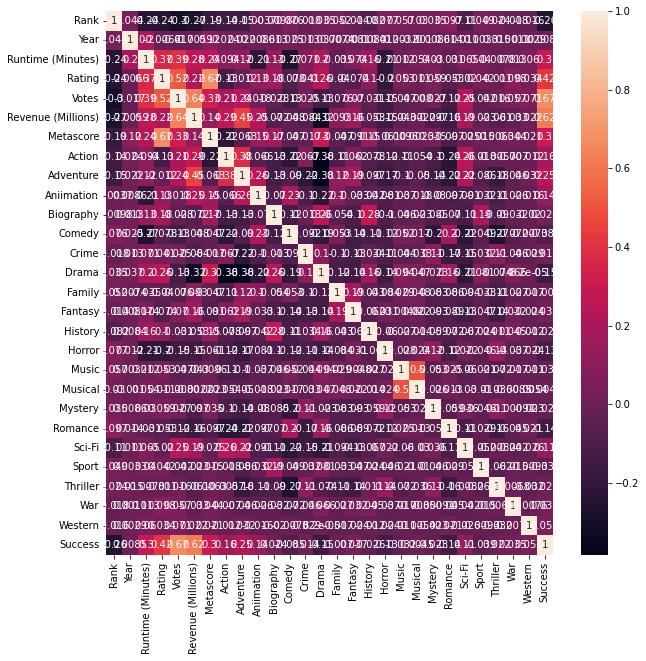

In [14]:
# EXPLORATORY DATA ANALYSIS
correlation=df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,annot=True)

<AxesSubplot:xlabel='Success', ylabel='count'>

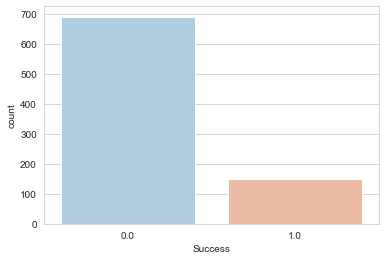

In [12]:
# BALANCING THE DATA
sns.set_style('whitegrid')
sns.countplot(x = 'Success', data = df, palette = 'RdBu_r')

In [13]:
# ASSIGNING DEPENDENT AND INDEPENDENT FEATURES
X = df.iloc[:, :-1]  # or X = df.drop(['Success'], axis=1)
y = df.iloc[:,-1]   # or y = df['Success']

In [15]:
# TRAIN TEST THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [16]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for i in X_train.columns:
    X_train[i]=le.fit_transform( X_train[i].astype(str))
    

X_train.head()

,Rank,Title,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
641,486,626,5,11,36,280,198,63,0,1,...,0,0,0,0,0,0,0,0,0,1
103,17,2,11,5,32,193,563,59,0,0,...,1,0,0,1,0,0,0,0,0,0
247,136,667,2,57,37,354,360,61,0,0,...,0,0,0,0,0,0,0,0,0,0
153,60,196,8,27,40,411,283,72,0,0,...,0,0,0,0,1,1,0,0,0,0
702,545,95,11,20,30,531,22,55,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for i in X_test.columns:
    X_test[i]=le.fit_transform( X_test[i].astype(str))
    

X_test.head()

,Rank,Title,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
366,69,94,9,15,15,6,50,34,0,0,...,0,1,0,0,0,0,0,0,0,0
118,8,45,7,30,21,82,70,32,1,0,...,0,0,0,0,0,0,0,1,0,0
381,74,167,10,2,2,115,84,7,0,0,...,0,0,0,0,0,0,0,0,0,0
587,121,162,5,12,25,5,8,39,0,0,...,0,0,0,1,0,0,0,1,0,0
98,1,0,7,34,31,116,137,61,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# NORMALIZING FEATURES
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier()
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = Classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87       162
         1.0       0.03      0.17      0.05         6

    accuracy                           0.77       168
   macro avg       0.50      0.48      0.46       168
weighted avg       0.93      0.77      0.84       168

[[128  34]
 [  5   1]]


In [30]:
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(Classifier, open('model.pkl','wb'))